In [2]:
#importamos el módulo que vamos a usar 
import random   

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




$E[X_i] = \sum_i x_{i}P(X=x_{i}) = 1*P(x=1) + 0*P(x=0) = 1*\frac{\pi}{4} + 0 * 1-\frac{\pi}{4} = \frac{\pi}{4} \approx 0.785398$ 

$V[x_{i}] = E[X_{i}^{2}] - E[X_i]^{2} = 1^{2}*\frac{\pi}{4} - (\frac{\pi}{4})^{2} = \frac{\pi}{4}(1-\frac{\pi}{4}) \approx 0.1685479$

Para el experimento de simulación, definimos $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$

En el siguiente código se obtiene la esperanza y la varianza mediante simulación

In [59]:
#Utilizando el mismo código para calcular la esperanza y varianza por simulación
from statistics import mean, variance
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    xi = 0
    Z = []
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
            xi = 1
            Z.append(xi) #Se añade el valor de xi = 1
        else:
            xi = 0
            Z.append(xi) #Se añade el valor de xi = 0
        pi = 4.0*float(counter)/(i + 1)
        e = np.absolute((pi - np.pi)/np.pi)
        
    media = mean(Z) #Obtenemos la media de la V.A xi
    p=np.pi/4
    errorE = np.absolute((media - (p))/(p)) 
    varianza = variance(Z)
    errorV = np.absolute((varianza - ((p)*(1-p)))/(p))
    print("pi =", pi)
    print("error =", e)
    print("Valor esperado obtenido mediante simulación", media,"Error en el calculo de la esperanza", errorE)
    print("Valor de la varianza por simulación", varianza, "Error respecto al valor real", errorV)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.1484
error = 0.0021668456610466173
Valor esperado obtenido mediante simulación 0.7871 Error en el calculo de la esperanza 0.0021668456610466173
Valor de la varianza por simulación 0.1675903490349035 Error respecto al valor real 0.0012191768953441623


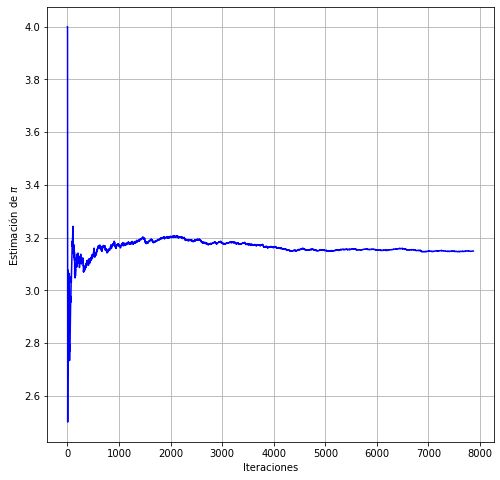

In [60]:
pi_mc(10000)